In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive"

 AIML
'Colab Notebooks'
'Google Photos'
'How to get started with Drive.pdf'
'Ramesh PAN'
"Sachin's 12th boards and competitive exams.xlsx"
'Saritha Aadhaar'
'Saritha PAN'
'Shakthi folder'
'Untitled presentation.gslides'


# Smart phone Recommendation system

# Project Objective: is to build a recommendation system using popularity based and collaborative filtering methods to recommend 
mobile phones to a user which are most popular and personalised respectively

# 1. Importing libraries, datasets and cleansing

In [2]:
# 1A.... Merge all the CSV's into one Dataframe

cwd = os.getcwd()
print("working directory is",cwd)

phone_1_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Recommendation systems/phone_user_review_file_1.csv", encoding='latin-1')
phone_2_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Recommendation systems/phone_user_review_file_2.csv", encoding='latin-1')
phone_3_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Recommendation systems/phone_user_review_file_3.csv", encoding='latin-1')
phone_4_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Recommendation systems/phone_user_review_file_4.csv", encoding='latin-1')
phone_5_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Recommendation systems/phone_user_review_file_5.csv", encoding='latin-1')
phone_6_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Project/Recommendation systems/phone_user_review_file_6.csv", encoding='latin-1')


working directory is /content


In [9]:
phone_1_df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [10]:
phone_2_df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/leagoo-lead-7/,4/15/2015,en,us,Amazon,amazon.com,2.0,10.0,"The telephone headset is of poor quality , not...",luis,Leagoo Lead7 5.0 Inch HD JDI LTPS Screen 3G Sm...
1,/cellphones/leagoo-lead-7/,5/23/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,This is my first smartphone so I have nothing ...,Mark Lavin,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
2,/cellphones/leagoo-lead-7/,4/27/2015,en,gb,Amazon,amazon.co.uk,8.0,10.0,Great phone. Battery life not great but seems ...,tracey,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
3,/cellphones/leagoo-lead-7/,4/22/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Best 90 quid I've ever spent on a smart phone,Reuben Ingram,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...
4,/cellphones/leagoo-lead-7/,4/18/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,I m happy with this phone.it s very good.thx team,viorel,Leagoo Lead 7 Lead7 MTK6582 Quad core 1GB RAM ...


In [11]:
phone_3_df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,11/7/2015,pt,br,Submarino,submarino.com.br,6.0,10.0,"recomendo, eu comprei um, a um ano, e agora co...",herlington tesch,Samsung Smartphone Samsung Galaxy S3 Slim G381...
1,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,10/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,Comprei um pouco desconfiada do site e do celu...,Luisa Silva Marieta,Samsung Smartphone Samsung Galaxy S3 Slim G381...
2,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,10.0,10.0,"Muito bom o produto, obvio que tem versÃµes me...",Cyrus,Samsung Smartphone Samsung Galaxy S3 Slim G381...
3,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/2/2015,pt,br,Submarino,submarino.com.br,8.0,10.0,Unica ressalva fica para a camera que poderia ...,Marcela Santa Clara Brito,Samsung Smartphone Samsung Galaxy S3 Slim G381...
4,/cellphones/samsung-galaxy-s-iii-slim-sm-g3812/,9/1/2015,pt,br,Colombo,colombo.com.br,8.0,10.0,Rapidez e atenÃ§Ã£o na entrega. O aparelho Ã© ...,Claudine Maria Kuhn Walendorff,"Smartphone Samsung Galaxy S3 Slim, Dual Chip, ..."


In [12]:
phone_4_df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-s7262-duos-galaxy-ace/,3/11/2015,en,us,Amazon,amazon.com,2.0,10.0,was not conpatable with my phone as stated. I ...,Frances DeSimone,Samsung Galaxy Star Pro DUOS S7262 Unlocked Ce...
1,/cellphones/samsung-s7262-duos-galaxy-ace/,17/11/2015,en,in,Zopper,zopper.com,10.0,10.0,Decent Functions and Easy to Operate Pros:- Th...,Expert Review,Samsung Galaxy Star Pro S7262 Black
2,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,4.0,10.0,Not Good Phone such price. Hang too much and v...,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
3,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,6.0,10.0,not bad for features,Amazon Customer,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)
4,/cellphones/samsung-s7262-duos-galaxy-ace/,29/10/2015,en,in,Amazon,amazon.in,10.0,10.0,Excellent product,NHK,Samsung Galaxy Star Pro GT-S7262 (Midnight Black)


In [13]:
phone_5_df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,2.0,10.0,I bought 1 month before. currently speaker is ...,venkatesh,Karbonn K1616
1,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,6.0,10.0,"I just bought one week back, I have Airtel con...",Venkat,Karbonn K1616
2,/cellphones/karbonn-k1616/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,one problem in this handset opera is not worki...,krrish,Karbonn K1616
3,/cellphones/karbonn-k1616/,4/25/2014,en,in,Naaptol,naaptol.com,10.0,10.0,here Karbonn comes up with an another excellen...,BRIJESH CHAUHAN,Karbonn K1616 - Black
4,/cellphones/karbonn-k1616/,4/23/2013,en,in,Naaptol,naaptol.com,10.0,10.0,"What a phone, all so on Naaptol my god 23% off...",Suraj CHAUHAN,Karbonn K1616 - Black


In [15]:
phone_6_df.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-instinct-sph-m800/,9/16/2011,en,us,Phone Arena,phonearena.com,8.0,10.0,I've had the phone for awhile and it's a prett...,ajabrams95,Samsung Instinct HD
1,/cellphones/samsung-instinct-sph-m800/,2/13/2014,en,us,Amazon,amazon.com,6.0,10.0,to be clear it is not the sellers fault that t...,Stephanie,Samsung SPH M800 Instinct
2,/cellphones/samsung-instinct-sph-m800/,12/30/2011,en,us,Phone Scoop,phonescoop.com,9.0,10.0,Well i love this phone. i have had ton of phon...,snickers,Instinct M800
3,/cellphones/samsung-instinct-sph-m800/,10/18/2008,en,us,HandCellPhone,handcellphone.com,4.0,10.0,I have had my Instinct for several months now ...,A4C,Samsung Instinct
4,/cellphones/samsung-instinct-sph-m800/,9/6/2008,en,us,Reviewed.com,reviewed.com,6.0,10.0,i have had this instinct phone for about two m...,betaBgood,Samsung Instinct


In [16]:
print(phone_1_df.shape)
print(phone_2_df.shape)
print(phone_3_df.shape)
print(phone_4_df.shape)
print(phone_5_df.shape)
print(phone_6_df.shape)

(374910, 11)
(114925, 11)
(312961, 11)
(98284, 11)
(350216, 11)
(163837, 11)


In [17]:
print(phone_1_df.dtypes)
print("")
print(phone_2_df.dtypes)
print("")
print(phone_3_df.dtypes)
print("")
print(phone_4_df.dtypes)
print("")
print(phone_5_df.dtypes)
print("")
print(phone_6_df.dtypes)

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

phone_url     ob

In [3]:
# All the dataframes have the same set of columns but varying rows, they can be merged with axis=0 (vertically by row)

phone_final = pd.concat([phone_1_df, phone_2_df, phone_3_df, phone_4_df, phone_5_df, phone_6_df], axis=0)

In [4]:
#   1B.......... Exploring the final dataframe and sharing observations

phone_final.shape

(1415133, 11)

In [8]:
phone_final.describe()

,score,score_max
count,1.351644e+06,1351644.0
mean,8.007060e+00,10.0
std,2.616121e+00,0.0
min,2.000000e-01,10.0
25%,7.200000e+00,10.0
50%,9.200000e+00,10.0
75%,1.000000e+01,10.0
max,1.000000e+01,10.0


In [21]:
phone_final.head(5)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [22]:
phone_final['lang'].value_counts()

en    554746
ru    207443
de    176600
it    116120
es     99739
fr     95080
pt     67155
nl     38375
tr     28359
sv     17149
fi      6953
cs      2533
no      1918
he      1370
pl       493
da       418
hu       346
id       271
ja        33
zh        19
ar        12
ko         1
Name: lang, dtype: int64

In [23]:
phone_final['country'].value_counts()

us    318435
de    176525
ru    174945
in    127876
it    116120
gb     95795
fr     95080
es     76271
br     63975
ua     32498
tr     28359
nl     25716
se     17149
ar     15636
be     12659
ca     11118
fi      6953
pt      3180
mx      3142
cz      2533
no      1918
ec      1478
au      1413
il      1370
co      1350
uy       725
cl       603
pl       493
dk       418
ve       389
hu       346
id       271
pe       145
ch        75
nz        74
jp        33
za        25
tw        14
ae        12
sg        10
cn         5
kr         1
Name: country, dtype: int64

In [24]:
phone_final['source'].value_counts()

Amazon             728471
Yandex             123066
Ciao                59425
Samsung             45585
MercadoLibre        33531
                    ...  
Comtech                 1
Karsilastir             1
Quelle                  1
Elkj??p                 1
RECENZJE.NET.PL         1
Name: source, Length: 331, dtype: int64

In [25]:
phone_final['domain'].value_counts()

amazon.com                  214776
amazon.de                   132720
market.yandex.ru            123066
amazon.in                   112880
amazon.it                    89533
                             ...  
dwidigitalcameras.com.au         1
shop.ca                          1
quelle.de                        1
qvcuk.com                        1
recenzje.net.pl                  1
Name: domain, Length: 384, dtype: int64

In [26]:
phone_final['phone_url'].value_counts()

/cellphones/samsung-galaxy-s-iii/      17093
/cellphones/apple-iphone-5s/           16379
/cellphones/samsung-galaxy-s6/         16145
/cellphones/samsung-galaxy-s5/         16082
/cellphones/samsung-galaxy-s7-edge/    15917
                                       ...  
/cellphones/blu-quattro-5-7-hd/            1
/cellphones/lg-vx3450/                     1
/cellphones/blackberry-7105t/              1
/cellphones/o2-xda-nova/                   1
/cellphones/samsung-chrono-2/              1
Name: phone_url, Length: 5556, dtype: int64

In [27]:
phone_final['author'].value_counts()

Amazon Customer                    76978
Cliente Amazon                     19304
e-bit                               8663
Client d'Amazon                     7716
Amazon Kunde                        4750
                                   ...  
Julen Crespo Arocena                   1
Sigfrido                               1
Alex Torres                            1
Maria Concepcion AndrÃ©s LÃ³pez        1
claudia0815                            1
Name: author, Length: 801103, dtype: int64

In [28]:
phone_final['score_max'].value_counts()

10.0    1351644
Name: score_max, dtype: int64

In [29]:
phone_final[phone_final['country'] == 'in']

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
231,/cellphones/samsung-galaxy-s8/,4/19/2017,en,in,Smartprix,smartprix.com,8.0,10.0,It could be much better if it would come with ...,Indranil Roy,Samsung Galaxy S8
3368,/cellphones/samsung-galaxy-s6-edgeplus/,10/19/2015,en,in,Amazon,amazon.in,2.0,10.0,samsung connection is not good,Amazon Customer,"Samsung Galaxy S6 Edge Plus (32GB, Silver Tita..."
3417,/cellphones/samsung-galaxy-s6-edgeplus/,10/17/2015,en,in,Amazon,amazon.in,8.0,10.0,"The bigger, the better. Samsung has proved the...",Bhavik,"Samsung Galaxy S6 Edge Plus (32GB, Silver Tita..."
3418,/cellphones/samsung-galaxy-s6-edgeplus/,10/17/2015,en,in,Amazon,amazon.in,2.0,10.0,What the he'll in this of 60000,prashant,"Samsung Galaxy S6 Edge Plus (32GB, Silver Tita..."
3419,/cellphones/samsung-galaxy-s6-edgeplus/,10/17/2015,en,in,Amazon,amazon.in,10.0,10.0,Unbelivable Facts about Flagship Mobile #S7Edg...,Amazon Customer,"Samsung Galaxy S6 Edge Plus (32GB, Silver Tita..."
...,...,...,...,...,...,...,...,...,...,...,...
122762,/cellphones/nokia-3200/,7/13/2016,en,in,91 Mobiles,91mobiles.com,4.0,10.0,this phone isa great phone. it come with a tra...,Mohammed Faisal,Nokia 3200
125981,/cellphones/nokia-6100/,10/1/2004,en,in,Amazon,amazon.in,2.0,10.0,"display problem, and when sim, battery kept in...",Amazon Customer,"Nokia 6100 Mobile - Light Blue Color, Genuine ..."
125982,/cellphones/nokia-6100/,10/1/2004,en,in,Amazon,amazon.in,10.0,10.0,Ritan bhejo arjant,Amazon Customer,"Nokia 6100 Mobile - Light Blue Color, Genuine ..."
125984,/cellphones/nokia-6100/,9/30/2004,en,in,Amazon,amazon.in,10.0,10.0,Product is original but manufacturers at 2004 ...,CHETAN RAJPUT,"Nokia 6100 Mobile - Light Blue Color, Genuine ..."


In [31]:
#  1B.... Sharing observations

# There are too many rows..... (14,15,133) and just 11 columns

# only Score and score_max are the numeric columns and rest everything is an Object column

# Score_max seems to have all the data as 10, the std deviation is 0 

# There seems to be lots of blank rows in score_max and score since their count is only 13,51,644.

# There are lots of blanks in author, extract columns too, there are some "-" rows also in extract and author

# There are 22 languages in the lang column with English having the max count (en - 5,54,746)

# There are 42 countries in the country column with USA having the max count (us - 3,18,435)

# Maximum information has been sourced from Amazon - 7,28,471

# maximum domains are also from amazon"""


In [32]:
#  1C.... rounding off scores to the nearest integers

phone_final['score'].head(10)

0    10.0
1    10.0
2     6.0
3     9.2
4     4.0
5    10.0
6     4.0
7     6.0
8     6.0
9     8.0
Name: score, dtype: float64

In [33]:
phone_final['score'].describe()

count    1.351644e+06
mean     8.007060e+00
std      2.616121e+00
min      2.000000e-01
25%      7.200000e+00
50%      9.200000e+00
75%      1.000000e+01
max      1.000000e+01
Name: score, dtype: float64

In [34]:
print("min",phone_final['score'].min())
print("max",phone_final['score'].max())
print("median",phone_final['score'].median())
print("mean",phone_final['score'].mean())

min 0.2
max 10.0
median 9.2
mean 8.007059551183373


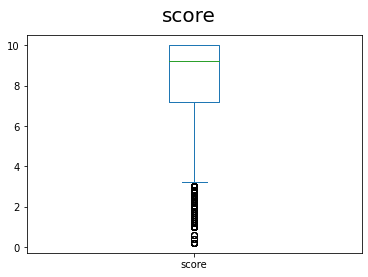

In [35]:
fig = plt.figure(figsize = (6,4))
fig.suptitle('score', fontsize=20)
phone_final['score'].plot.box()
plt.show()

There are lots of Outliers found below Q1

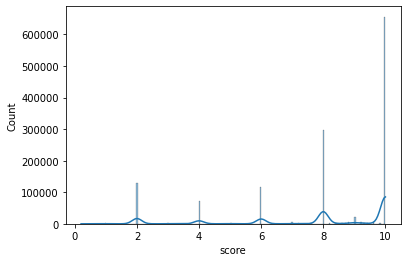

In [36]:
#fig.suptitle(col, fontsize=20)
sns.histplot(phone_final['score'], kde=True)

In [ ]:
# Most of the Authors have given a 10 score rating, followed by 8 score rating

In [37]:
phone_final['score'].value_counts()

10.0    656239
8.0     296018
2.0     128485
6.0     116616
4.0      72462
         ...  
0.4          2
6.1          1
1.5          1
8.9          1
4.9          1
Name: score, Length: 86, dtype: int64

In [5]:
final_backup = phone_final.copy()

In [6]:
phone_final['score'] = phone_final['score'].fillna(0)

In [7]:
phone_final['score'] = phone_final['score'].apply("int64")

In [8]:
phone_final['score'].dtype

dtype('int64')

In [9]:
phone_final['score'] = phone_final['score'].round().astype(int)

In [10]:
phone_final['score'].value_counts()

10    656239
8     311095
2     128958
6     119020
4      73617
0      63535
9      41349
7      10602
5       4762
1       3323
3       2633
Name: score, dtype: int64

Maximum authors have given a score rating of 10 and very very few authors have a score rating of 3

In [11]:
Q1 = np.percentile(phone_final['score'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(phone_final['score'], 75,interpolation = 'midpoint')
    
IQR = Q3 - Q1
        
#Upper bound
upper = (Q3+1.5*IQR)
# Lower bound
lower = (Q1-1.5*IQR)
        
median = phone_final['score'].quantile(0.50)
                        
print("Median is",median) 
print("Q1 is", Q1)
print("Q3 is", Q3)
print("IQR is", IQR)
print("Upper bound is",upper)
print("Lower bound is",lower)
        

Median is 8.0
Q1 is 6.0
Q3 is 10.0
IQR is 4.0
Upper bound is 16.0
Lower bound is 0.0


In [12]:
#  1D.... Checking for missing values and imputing missing values

phone_final.value_counts().isna().sum()

0

In [47]:
phone_final.value_counts().isnull().sum()

0

In [13]:
for i in phone_final.columns:
    percent_missing = phone_final[i].isnull().sum() * 100 / len(phone_final[i])
    print("column is ",i)
    print(percent_missing)
    

column is  phone_url
0.0
column is  date
0.0
column is  lang
0.0
column is  country
0.0
column is  source
0.0
column is  domain
0.0
column is  score
0.0
column is  score_max
4.486433430638675
column is  extract
1.3681399557497422
column is  author
4.466152651376231
column is  product
7.066473610607625e-05


In [14]:
# Check for missing values present
print('Number of missing values across columns-\n', phone_final.isnull().sum())

Number of missing values across columns-
 phone_url        0
date             0
lang             0
country          0
source           0
domain           0
score            0
score_max    63489
extract      19361
author       63202
product          1
dtype: int64


In [15]:
phone_final['product'].isnull().sum()

1

In [16]:
phone_final[phone_final['product'].isnull()]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
312960,/cellphones/samsung-galaxy-s-iii/,1/22/2014,de,de,Amazon,amazon.de,10,10.0,Bestes Smartphone was ich bisher hatte :) Ã¶af...,NaN,NaN


In [17]:
phone_final.iloc[[312960]]

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
312960,/cellphones/nokia-lumia-930/,8/31/2014,en,gb,Amazon,amazon.co.uk,10,10.0,Very happy with the Lumia 930 (Green) no wirel...,Adam Pearson,Nokia Lumia 930 4G UK SIM-Free Smartphone - Or...


In [18]:
phone_final.drop(index=312960, inplace=True)

In [19]:
phone_final.shape

(1415130, 11)

In [ ]:
# So only the following columns seems to be having missing values

# score_max
# extract
# author
# product

#There is only one missing data in product, i guess that row can then be dropped.

# and only those columns need to be imputed with appropriate values

In [20]:
na_cols = 0
median_cols = 0
for i in phone_final.columns:
    percent_missing = phone_final[i].isnull().sum() * 100 / len(phone_final[i])
    print("column is ",i)
    print(percent_missing)
    
    if (  (i == 'score_max') ):
        median = phone_final[i].median()
        phone_final[i].fillna(median, inplace=True)   #..... Imputing with median
        median_cols = median_cols+1
        print("median imputing column",i)
    elif ((i == 'author') or (i == 'extract')):
        na = "Not Available"
        phone_final[i].fillna(na, inplace=True)    #.... Imputing with "Not available"
        na_cols = na_cols+1
        print("Not available imputing column",i)
    

column is  phone_url
0.0
column is  date
0.0
column is  lang
0.0
column is  country
0.0
column is  source
0.0
column is  domain
0.0
column is  score
0.0
column is  score_max
4.486442941637871
median imputing column score_max
column is  extract
1.3681428561333588
Not available imputing column extract
column is  author
4.466091454495347
Not available imputing column author
column is  product
0.0


In [56]:
phone_final['score_max'].isnull().sum()

0

In [57]:
phone_final['author'].isnull().sum()

0

In [58]:
phone_final['extract'].isnull().sum()

0

In [21]:
# Re-checking for missing values present
print('Number of missing values across columns-\n', phone_final.isnull().sum())

Number of missing values across columns-
 phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64


In [22]:
phone_final['author'].value_counts()

Amazon Customer                    76978
Not Available                      63202
Cliente Amazon                     19304
e-bit                               8663
Client d'Amazon                     7716
                                   ...  
Julen Crespo Arocena                   1
Sigfrido                               1
Alex Torres                            1
Maria Concepcion AndrÃ©s LÃ³pez        1
claudia0815                            1
Name: author, Length: 801102, dtype: int64

In [23]:
phone_bkp_mil = phone_final.copy()

In [24]:
#  1F........ randomly taking only 1 lakh data samples from the dataset

phone_lakh = phone_final.sample(n=100000, random_state=612)

In [25]:
phone_lakh.shape

(100000, 11)

In [26]:
#  1G..... dropping all other features and keeping only Author, Product and score

phone_bkp_drop = phone_lakh.copy()

phone_lakh.drop(["phone_url", "date", "lang", "country", "source", "domain", "score_max", "extract"], axis=1, inplace=True)

In [27]:
phone_lakh.shape

(100000, 3)

In [28]:
phone_lakh.describe()

,score
count,100000.000000
mean,7.622790
std,3.045534
min,0.000000
25%,6.000000
50%,8.000000
75%,10.000000
max,10.000000


In [29]:
phone_lakh.dtypes

score       int64
author     object
product    object
dtype: object

In [30]:
phone_lakh

,score,author,product
16516,10,300,Sony Xperia S
349503,0,ozer,Samsung G810 Cep Telefonu
154466,10,"mk ""mk""",Samsung E1150 Handy (extralange Akkulaufzeit) ...
268980,2,Jacob,Pantech Pursuit P9020 Unlocked GSM Phone with ...
172059,10,jus100sss.marchencko,Apple iPhone 3GS 16Gb
...,...,...,...
295937,2,EJ,Nokia 1661 SIM-Free Mobile Phone - Black
10390,10,ShorTee,Huawei G610S Snapdragon Quad Core 1.2GHz 5 Inc...
32715,9,sujayvemuri,LG Optimus One
289422,10,Not Available,LG KF690


In [31]:
phone_lakh.nunique()

score         11
author     73162
product    26164
dtype: int64

In [ ]:
# There are 11 unique scores, Huge number of Unique Authors (73,162) and relatively lower Products (26,164)
# Unique authors are almost 3x of the unique Products




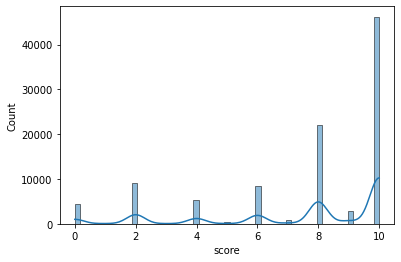

In [32]:
#fig.suptitle(col, fontsize=20)
sns.histplot(phone_lakh['score'], kde=True)

In [33]:
phone_lakh['score'].value_counts()

10    46203
8     22012
2      9115
6      8453
4      5317
0      4493
9      2913
7       772
5       303
1       228
3       191
Name: score, dtype: int64

In [ ]:
# In the Million shape dataset the 10 score rating is the highest and is more than double that of the next nearest 8 score 
# rating.  The other score ratings are relatively smaller.......... 3 score rating is the lowest of the lot

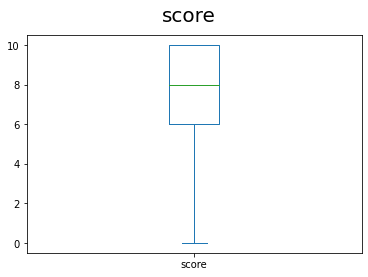

In [34]:
fig = plt.figure(figsize = (6,4))
fig.suptitle('score', fontsize=20)
phone_lakh['score'].plot.box()
plt.show()

In [ ]:
# The million shape dataset looks to be cleaner without any outliers that we saw in the full dataset

# 2. Answer the following questions

In [35]:
#  2A.... Identifying most rated products - Popularity based recommendation system

n_score = len(phone_lakh["score"])
n_phones = len(phone_lakh['product'].unique())
n_authors = len(phone_lakh['author'].unique())
  
print(f"Number of score: {n_score}")
print(f"Number of unique phones: {n_phones}")
print(f"Number of unique authors: {n_authors}")
print(f"Average score per author: {round(n_score/n_authors, 2)}")
print(f"Average score per phone: {round(n_score/n_phones, 2)}")
  
author_freq = phone_lakh[['author', 'product']].groupby('author').count().reset_index()
author_freq.columns = ['author', 'n_score']
author_freq.head()


Number of score: 100000
Number of unique phones: 26164
Number of unique authors: 73162
Average score per author: 1.37
Average score per phone: 3.82


,author,n_score
0,"""alifinney2""",1
1,"""aunt"" Cindy",1
2,"""florian1987""",1
3,"""jotde123""",1
4,"""kamui_oshiro""",1


In [36]:
# Find Lowest and Highest rated movies:
mean_score = phone_lakh.groupby('product')[['score']].mean()


In [37]:
mean_score

,score
product,
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.000000
"(DG300 Versione Aggiornata)5'' DOOGEE VOYAGER2 DG310 Dual Flashlights IPS Screen 3G Smartphone Android 4.4 MTK6582 1.3GHz Quad Core Telefono Cellulare Dual SIM 8G ROM OTG OTA GPS WIFI, BIANCO",8.800000
**** COFFRET WIKO OFFICIEL **** Housse WIKO CINK FIVE Coque wiko cink five protection flip cover Etui wiko five...,6.000000
03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM),10.000000
1006,3.000000
...,...
×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 32GB,10.000000
×××¤×× ×¡××××¨× Xiaomi Redmi Note 4 64GB,9.333333
×××¤×× ×¡××××¨× iPhone 5s 16GB SimFree ××××¦×¨× Apple,7.333333


In [38]:
# Lowest rated phones
lowest_scored = mean_score['score'].idxmin()
phone_lakh.loc[phone_lakh['product'] == lowest_scored]


,score,author,product
279610,0,Not Available,"4.3"" Screen 8MP Camera Android Dual SIM"
279609,0,Not Available,"4.3"" Screen 8MP Camera Android Dual SIM"


In [39]:
# Highest rated phones
highest_scored = mean_score['score'].idxmax()
phone_lakh.loc[phone_lakh['product'] == highest_scored]

,score,author,product
277871,10,Cliente Amazon,'Sony Xperia X (F5122) â White â Dual Sim ...


In [40]:
mean_score.sort_values(by=['score'], ascending=False)

,score
product,
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.0
NOKIA Lumia 530 double sim blanc,10.0
NOKIA Lumia 635 jaune,10.0
NOKIA Lumia 635 orange,10.0
NOKIA Lumia 735 noir,10.0
...,...
Smartphone Nokia Asha 205 Dual Chip Desbloqueado Preto,0.0
Smartphone Nokia Asha 205 Dual Chip Desbloqueado Preto/Azul,0.0
Nokia E50 Cep Telefonu,0.0


In [41]:
mean_score['score_counts'] = pd.DataFrame(phone_lakh.groupby('product')['score'].count())

In [42]:
#.......... 2A....... Most rated products....

mean_score.sort_values(by=['score','score_counts'], ascending=False).head(10)

#..... Below mentioned are the most rated Phones with the highest scores and highest counts....



,score,score_counts
product,,
"Apple iPhone 6s 4,7"" 128 GB",10.0,31
"HTC One Smartphone, Display 4.7 Pollici, Fotocamera Ultrapixel, 32 GB, Processore Quad Core da 1.7 GHz, 2 GB RAM...",10.0,15
Nokia Smartphone Nokia Lumia 520 Desbloqueado Oi Preto Windows Phone 8 CÃ¢mera 5MP 3G Wi-Fi MemÃ³ria Interna 8G GPS,10.0,15
Samsung Galaxy Note 4 4G SIM-Free Smartphone - Black,10.0,15
Samsung Smartphone Dual Chip Samsung Galaxy SIII Duos Desbloqueado Claro Azul Android 4.1 3G/Wi-Fi C??mera 5MP,10.0,15
Huawei Mate 2 - Factory Unlocked (White),10.0,13
LG G2 Sprint LS980,10.0,13
Samsung Galaxy Note5,10.0,13
Huawei Mate 9 with Amazon Alexa and Leica Dual Camera - 64GB Unlocked Phone - Space Gray (US Warranty),10.0,12


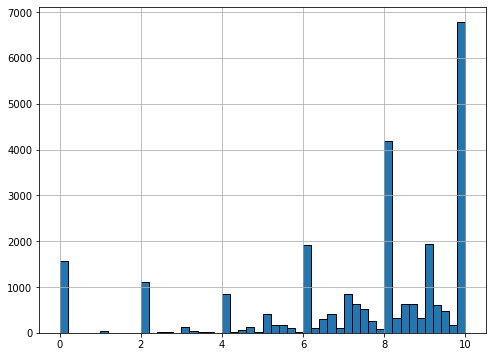

In [43]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
mean_score['score'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

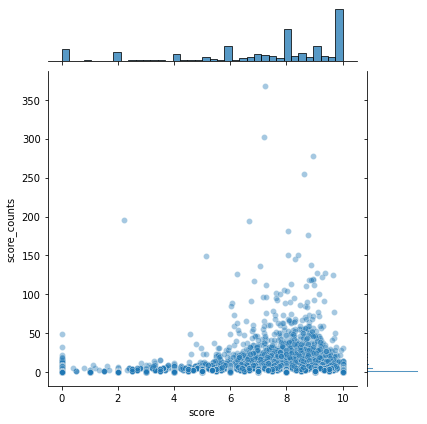

In [44]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='score', y='score_counts', data=mean_score, alpha=0.4)

In [45]:
author_freq.dtypes

author     object
n_score     int64
dtype: object

In [46]:
author_freq.sort_values(by=['n_score','author'], ascending=False).head(10)

,author,n_score
2811,Amazon Customer,5458
32657,Not Available,4396
8857,Cliente Amazon,1337
52571,e-bit,614
8855,Client d'Amazon,519
2836,Amazon Kunde,325
3884,Anonymous,219
52738,einer Kundin,188
52737,einem Kunden,146
68208,unknown,133


In [47]:
#........... 2C........ Products having more than 50 rating scores

rslt_df = mean_score.loc[mean_score['score_counts'] > 50].sort_values(by=['score','score_counts'], ascending=False)

In [48]:
rslt_df

,score,score_counts
product,,
"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)",9.692308,78
"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)",9.664000,125
"Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]",9.375000,128
Samsung Galaxy S7 edge 32GB (AT&T),9.351648,91
"Lenovo Motorola Moto G Smartphone, Display HD 4,5"", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]",9.288136,59
...,...,...
"Motorola Moto G, 4th Gen (White, 2 GB, 16 GB)",6.133333,60
"Lenovo Vibe K5 (Silver, 16GB)",6.044944,89
"Motorola Moto G, 4th Gen (Black, 2 GB, 16 GB)",6.023529,85


In [49]:
result2_df = author_freq.loc[author_freq['n_score'] > 50].sort_values(by=['n_score','author'], ascending=False)

In [50]:
result2_df

,author,n_score
2811,Amazon Customer,5458
32657,Not Available,4396
8857,Cliente Amazon,1337
52571,e-bit,614
8855,Client d'Amazon,519
2836,Amazon Kunde,325
3884,Anonymous,219
52738,einer Kundin,188
52737,einem Kunden,146
68208,unknown,133


In [51]:
#.......3......... Top 5 Mobile brands with a best score rating of 10 and high reviews are the following

rslt_df.head(5)

,score,score_counts
product,,
"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)",9.692308,78
"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)",9.664000,125
"Lenovo Motorola Moto G Smartphone, 4,5 pollici display HD, processore Qualcomm, memoria 16GB, MicroSIM, Android 4.3 OS, fotocamera da 5 MP, Nero [Germania]",9.375000,128
Samsung Galaxy S7 edge 32GB (AT&T),9.351648,91
"Lenovo Motorola Moto G Smartphone, Display HD 4,5"", Processore Qualcomm, Memoria 8 GB, MicroSIM, Android 4.4 OS, Fotocamera da 5 MP, Nero [Germania]",9.288136,59


In [92]:
!pip install scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.5 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633719 sha256=0784fb0f81ce400844f610523047b5e97218a00ee9cdae91cde47f07ffbb9e6a
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [52]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split

In [53]:
#### Set the rating scale from 1 to 10
reader = Reader(rating_scale=(1, 10))

In [55]:
data = Dataset.load_from_df(phone_lakh[['author', 'product', 'score']], reader)

In [56]:
# Split data to train and test
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.3,random_state=123)

In [57]:
trainset.n_ratings

70000

In [58]:
len(testset)

30000

In [59]:
from surprise import SVD
from surprise import accuracy

In [60]:
svd_model = SVD(n_factors=50,biased=False)
svd_model.fit(trainset)

In [61]:
test_pred_svd = svd_model.test(testset)

In [62]:
test_pred_svd

[Prediction(uid='GRACIELADAS', iid='BlackBerry 8700', r_ui=8.0, est=7.625757142857143, details={'was_impossible': True, 'reason': 'User and item are unknown.'}),
 Prediction(uid='?????????????? ??????????', iid='?????????????????? ?????????????? SONY Xperia E (C1505) ??????????', r_ui=4.0, est=7.625757142857143, details={'was_impossible': True, 'reason': 'User and item are unknown.'}),
 Prediction(uid='Jesssajor ', iid='Samsung Galaxy S5 16GB (Verizon)', r_ui=10.0, est=7.625757142857143, details={'was_impossible': True, 'reason': 'User and item are unknown.'}),
 Prediction(uid='Eder', iid='Apple iPhone 6 Plus Smartphone (5,5 Zoll (14 cm) Touch-Display, 16 GB Speicher, iOS 8) grau', r_ui=2.0, est=1, details={'was_impossible': False}),
 Prediction(uid='MAD', iid='Nokia 6150', r_ui=8.0, est=1, details={'was_impossible': False}),
 Prediction(uid='Not Available', iid='Samsung Galaxy Note 3 SM-N9005 32 GB LTE pink [14,43 cm Full HD Display, Android 4.3, 2.3 GHz QuadCore CPU]', r_ui=10.0, est

In [63]:
test_pred_svd_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred_svd])
test_pred_svd_df.head()

,0,1,2
0,GRACIELADAS,BlackBerry 8700,7.625757
1,?????????????? ??????????,?????????????????? ?????????????? SONY Xperia ...,7.625757
2,Jesssajor,Samsung Galaxy S5 16GB (Verizon),7.625757
3,Eder,"Apple iPhone 6 Plus Smartphone (5,5 Zoll (14 c...",1.000000
4,MAD,Nokia 6150,1.000000


In [64]:
test_pred_svd_df.columns = ["author","product","score"]
test_pred_svd_df.sort_values(by = ["author", "score"],ascending=False,inplace=True)

In [65]:
test_pred_svd_df.head(20)

,author,product,score
23850,×¡×¤××¨,×××¤×× ×¡××××¨× Sony Xperia Z5,7.625757
15249,× ×ª× ×××××,×××¤×× ×¡××××¨× LG Nexus 5 16GB D821,7.625757
14757,× ××¨,×××¤×× ×¡××××¨× Samsung Galaxy S7 Edge...,7.625757
21329,××©×¨×× ×.,Samsung Galaxy J5,7.625757
27392,××××¨,×××¤×× ×¡××××¨× Xiaomi Redmi 3s 32GB,7.625757
18366,××××× ×× ×××¨××,×××¤×× ×¡××××¨× Apple iPhone 6 Plus 64...,7.625757
25128,×××¢×,×××¤×× ×¡××××¨× Apple iPhone 6 16GB Si...,1.000000
28632,ÑÑÐ±ÑÐ½Ð¾Ð² Ð¿Ð°Ð²ÐµÐ»,LG GT540 Optimus,7.625757
25414,ÑÐ¸ÑÐ¾Ð² Ð¼Ð¸Ñ Ð°Ð¸Ð»,Sony Xperia Z1,7.625757
19767,ÑÐ¸Ð¿Ð°Ðº Ð»ÐµÐ»Ð¸Ðº,ASUS Zenfone 2 Laser ZE500KL 32Gb,7.625757


In [66]:
# compute RMSE
print("RMSE for SVD")
accuracy.rmse(test_pred_svd, verbose=True)

RMSE for SVD
RMSE: 3.8282


3.8282052632515646

In [62]:
# Run 5-fold cross-validation and print results.
from surprise.model_selection import cross_validate
cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.3828  3.3973  3.3965  3.4010  3.3808  3.3917  0.0082  
MAE (testset)     2.6280  2.6358  2.6410  2.6413  2.6370  2.6366  0.0048  
Fit time          46.37   47.92   48.68   46.64   48.00   47.52   0.88    
Test time         2.28    2.26    2.23    3.48    2.08    2.47    0.51    


{'fit_time': (46.371577978134155,
  47.92232704162598,
  48.68416452407837,
  46.635114431381226,
  48.00082516670227),
 'test_mae': array([2.6279763 , 2.63579845, 2.64098934, 2.64131888, 2.63696024]),
 'test_rmse': array([3.38282354, 3.39729218, 3.39647826, 3.40099543, 3.38082176]),
 'test_time': (2.2790236473083496,
  2.2595937252044678,
  2.234867811203003,
  3.4771907329559326,
  2.0774853229522705)}

In [67]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [ ]:
algo = KNNWithMeans(k=21, sim_options={'name': 'pearson', 'user_based': False})
algo.fit(trainset)

Computing the pearson similarity matrix...


In [ ]:
test_pred_knn = algo.test(testset)

In [ ]:
test_pred_knn_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred_knn])
test_pred_knn_df.head()

,0,1,2
0,GRACIELADAS,BlackBerry 8700,7.625757
1,?????????????? ??????????,?????????????????? ?????????????? SONY Xperia ...,7.625757
2,Jesssajor,Samsung Galaxy S5 16GB (Verizon),7.625757
3,Eder,"Apple iPhone 6 Plus Smartphone (5,5 Zoll (14 c...",7.000000
4,MAD,Nokia 6150,8.375000


In [ ]:
test_pred_knn_df.columns = ["author","product","pred_score"]
test_pred_knn_df.sort_values(by = ["product", "pred_score"],ascending=False,inplace=True)

In [ ]:
test_pred_knn_df

,author,product,pred_score
25658,Asaf,טלפון סלולרי Xiaomi Redmi Note 4 64GB,7.625757
24280,ohaddi,טלפון סלולרי Xiaomi Redmi Note 4 32GB,7.625757
9894,MZ,טלפון סלולרי Xiaomi Redmi Note 3 Pro 32GB,8.000000
10898,Roy,טלפון סלולרי Xiaomi Redmi 4A 16GB,7.625757
27392,יאיר,טלפון סלולרי Xiaomi Redmi 3s 32GB,7.625757
...,...,...,...
29427,bookworm656,1600,7.625757
23526,Spiritman,1110 / 1112,7.625757
7769,jh7980,1100,7.625757
2079,Heinrich1q,03 Apple MD300DN/A iPhone 5 32 GB Wei?? (GSM),7.625757


In [ ]:
test_pred_knn_df.sort_values(by = ["author", "pred_score"],ascending=False,inplace=True)

In [ ]:
test_pred_knn_df

,author,product,pred_score
23850,ספיר,טלפון סלולרי Sony Xperia Z5,7.625757
15249,נתן הגדול,טלפון סלולרי LG Nexus 5 16GB D821,7.625757
14757,ניר,טלפון סלולרי Samsung Galaxy S7 Edge SM-G935F 32GB,7.625757
21329,ישראל א.,Samsung Galaxy J5,7.625757
27392,יאיר,טלפון סלולרי Xiaomi Redmi 3s 32GB,7.625757
...,...,...,...
8444,"""purescot""",Nokia 3220 - Orange - Pay As You Go Mobile Phone,7.625757
16623,"""jotde123""",Microsoft Nokia 1110 blau Handy,7.625757
792,"""florian1987""",Samsung SGH-V200 Handy,7.625757
7767,"""aunt"" Cindy",Casio G'zOne C781 Ravine 2 Verizon Cell Phone ...,7.625757


In [ ]:
# compute RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred_knn, verbose=True)

Item-based Model : Test Set
RMSE: 3.0001


3.000072942089354

In [ ]:
top_5_recos = test_pred_knn_df.groupby("author").head(5).reset_index(drop=True)

In [ ]:
top_5_recos

,author,product,pred_score
0,ספיר,טלפון סלולרי Sony Xperia Z5,7.625757
1,נתן הגדול,טלפון סלולרי LG Nexus 5 16GB D821,7.625757
2,ניר,טלפון סלולרי Samsung Galaxy S7 Edge SM-G935F 32GB,7.625757
3,ישראל א.,Samsung Galaxy J5,7.625757
4,יאיר,טלפון סלולרי Xiaomi Redmi 3s 32GB,7.625757
...,...,...,...
25518,"""purescot""",Nokia 3220 - Orange - Pay As You Go Mobile Phone,7.625757
25519,"""jotde123""",Microsoft Nokia 1110 blau Handy,7.625757
25520,"""florian1987""",Samsung SGH-V200 Handy,7.625757
25521,"""aunt"" Cindy",Casio G'zOne C781 Ravine 2 Verizon Cell Phone ...,7.625757


In [ ]:
# User - User Collaborative filter

In [ ]:
algo_user = KNNWithMeans(k=21, sim_options={'name': 'pearson', 'user_based': True})
algo_user.fit(trainset)

Computing the pearson similarity matrix...


MemoryError: Unable to allocate 20.4 GiB for an array with shape (52313, 52313) and data type float64